1. Import required packages.
2. Load the data file
3. Select only the following columns from the dataset: 'PROPERTY TYPE', 'PRICE', 'BEDS', 'BATHS', 'SQUARE FEET', 'LOT SIZE'.

3 pts.

In [1]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import math

from google.colab import files
uploaded = files.upload()

import io

file_name = list(uploaded.keys())[0]
listings = pd.read_csv(io.BytesIO(uploaded[file_name]))

listings = listings[['PROPERTY TYPE', 'PRICE', 'BEDS', 'BATHS', 'SQUARE FEET', 'LOT SIZE']]

Saving Ali Haider Shalwani - Real Estate Dataset-2.csv to Ali Haider Shalwani - Real Estate Dataset-2.csv


4. Check for missing values using a heatmap.
5. Check data distribution by property type using a histogram (bar graph).
6. Exclude records if appropriate.

3 pts.



<Axes: >

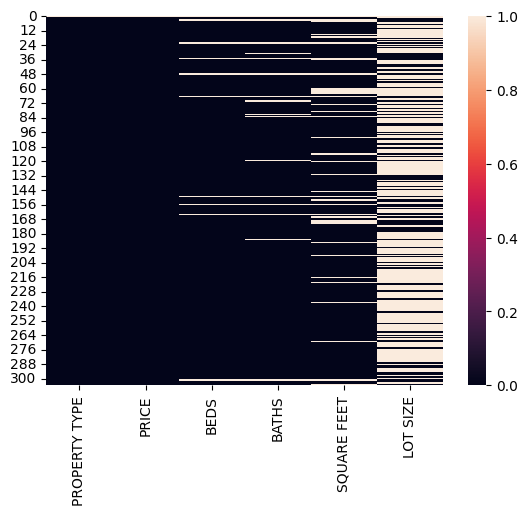

In [2]:
sns.heatmap(listings.isnull(), cbar=True)

<Axes: >

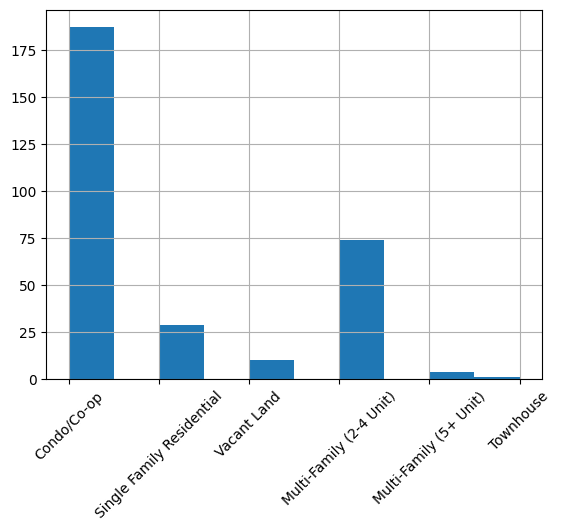

In [3]:
listings['PROPERTY TYPE'].hist(xrot=45.0)

In [4]:
property_types_to_remove = ['Townhouse', 'Multi-Family (5+ Unit)']

listings.drop(listings[listings['PROPERTY TYPE'].isin(property_types_to_remove)].index, inplace=True)

7. Build a pairplot to evaluate data distributions and correlations.
8. Comment whether the predictors: 1) have a linear relationship with the target (Price), 2) display constant variance (homoscedasticity), 3) contain outliers that need to be excluded.

5 pts.

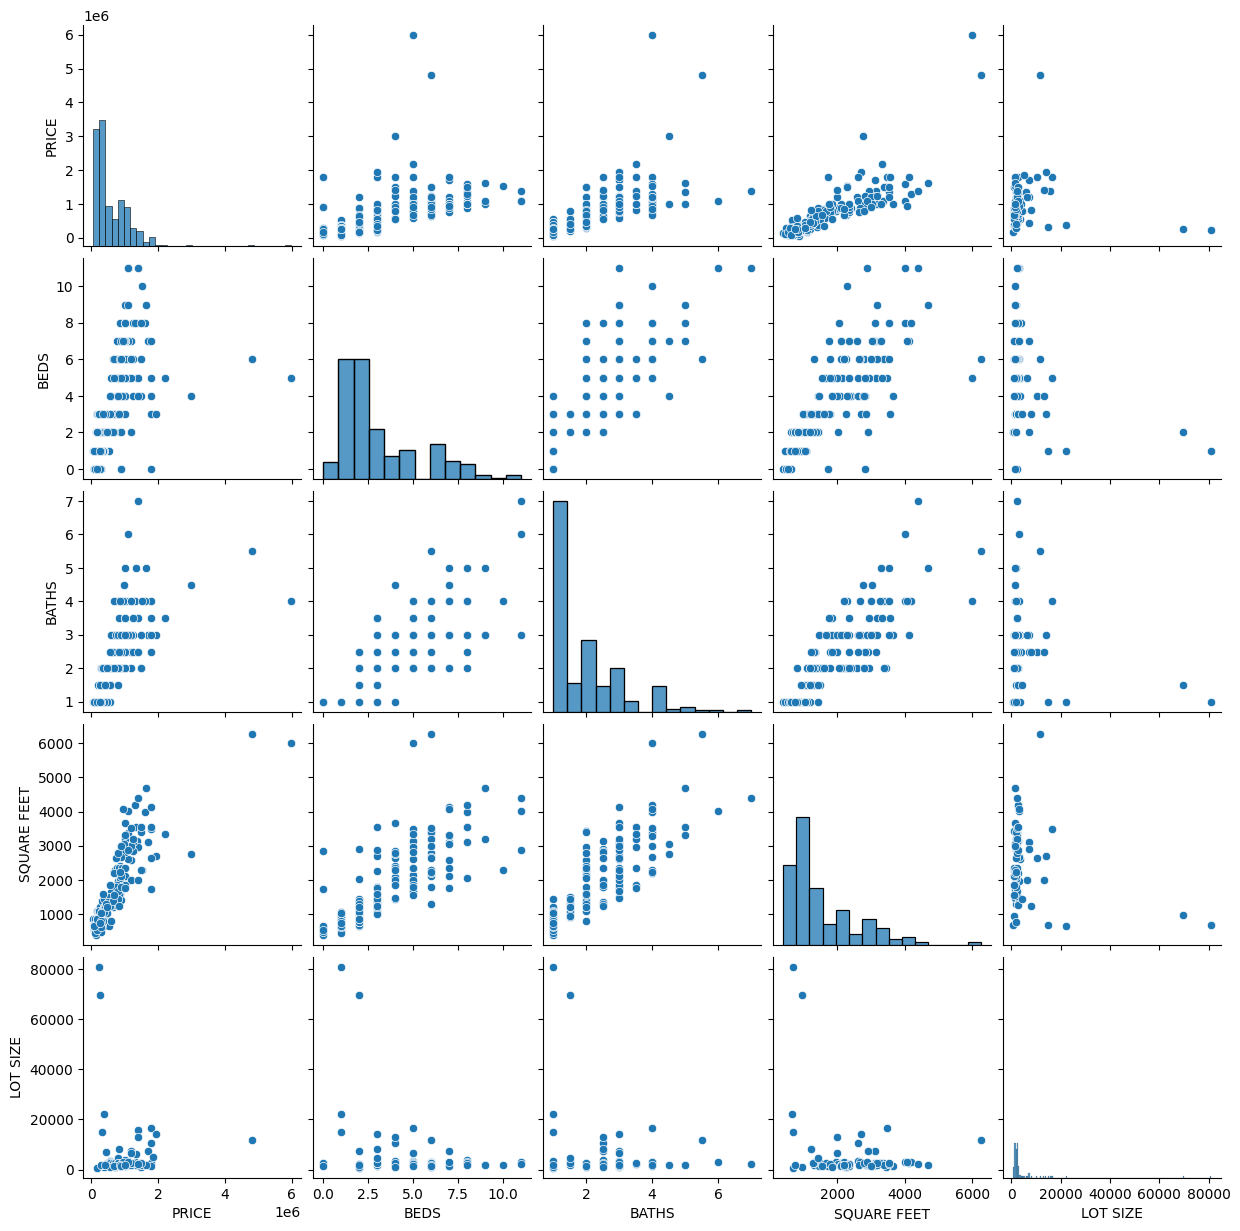

In [5]:
sns.pairplot(listings)


The pair plot reveals varying degrees of linear relationships between the predictors and the target variable SQR FT shows a noticeable positive linear relationship with proce, indicating that properties with larger square footage tend to have higher prices. Baths also exhibits a slight positive linear trend, suggesting that more bathrooms may be associated with higher property prices, though this relationship is weaker. On the other hand, beds and lot size do not display clear linear patterns with price, as the data points are widely scattered. Thus, these variables may not be reliable predictors of property price in a linear regression model.

The scatterplots suggest that the model does not satisfy the assumption of constant variance (homoscedasticity), especially for lot size and Sqr FT, where the variance in price increases with higher values. Moreover, there are several outliers in the dataset that could affect the model's performance. These outliers include properties with more than 6 baths, lot size more than 60,000, and SQR FT more than 4000.

9. Remove outliers if necessary.
10. Impute missing values as appropriate.

2 pts.


In [6]:
listings.drop(listings[listings['SQUARE FEET'] > 4000].index, inplace=True)
listings.drop(listings[listings['LOT SIZE'] > 60000].index, inplace=True)
listings.drop(listings[listings['BATHS'] > 6].index, inplace=True)

numeric_columns = listings.select_dtypes(include=['number']).columns
listings[numeric_columns] = listings[numeric_columns].fillna(listings[numeric_columns].mean())


11. Split data 70/30 into training and test datasets.
12. Build a multiple linear regression model to predict Price.
13. Report R2, MAE, Max error, RMSE.
14. Comment on whether the model performance would be acceptable for practitioners.

7 pts.

In [7]:
predictors = ['PROPERTY TYPE', 'BEDS', 'BATHS', 'SQUARE FEET', 'LOT SIZE']
X = pd.get_dummies(listings[predictors], drop_first=True)
y = listings['PRICE']

train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.3, random_state=1)
re_prices = LinearRegression()

re_prices.fit(train_X, train_y)
from sklearn.metrics import mean_absolute_error, mean_squared_error, max_error, r2_score, explained_variance_score
pred_y = re_prices.predict(valid_X)
print('Regression model performance evaluation')
print('R2: ', r2_score(valid_y, pred_y))
print('MAE: ', mean_absolute_error(valid_y, pred_y))
print('RMSE: ', math.sqrt(mean_squared_error(valid_y, pred_y)))
print('Max error: ', max_error(valid_y, pred_y))

Regression model performance evaluation
R2:  0.6503707257683611
MAE:  169742.26231056682
RMSE:  302685.20094715914
Max error:  1979329.3266467326


The regression model's performance shows moderate effectiveness, but it has limitations that could impact its practical use. With an R² value of approximately 0.65, the model explains 35% of the variance in property prices, which suggests it captures a significant portion of the data's variability. However, 35% of the variance remains unexplained, indicating room for improvement. The Mean Absolute Error (MAE) of around $169,742
suggests that, on average, the model's predictions deviate significantly from the actual values. This level of error might be acceptable for general estimates but could pose challenges in contexts where precision is crucial.

The Root Mean Squared Error (RMSE) of approximately $302,685 and the maximum error of about $1,979,329 further highlight the model's limitations. The relatively high RMSE indicates that while the model performs reasonably well in many cases, it is prone to large errors in some instances. The maximum error suggests that the model can occasionally make substantial prediction mistakes, which may not be acceptable for practitioners needing accurate and reliable property valuations. Consequently, while the model may serve as a useful tool for identifying general trends, its performance may not be adequate for high-stakes decision-making or applications where accuracy is paramount. Improving the model by adding more features, refining data, or employing advanced techniques could help enhance its practical utility.